This script solves the 2D heat equation:
$$\frac{\partial u}{\partial t} = \frac{\partial}{\partial x} \left(\alpha(x,y)\frac{\partial u}{\partial x}\right) + \frac{\partial}{\partial y} \left(\alpha(x,y)\frac{\partial u}{\partial y}\right) $$

with Dirichlet boundary conditions. The numerical scheme is a forward-time centered-space (FTCS) scheme. Note that the stability of the numerical solutions is dependent on the thermal diffusivity, $\alpha$ via the constraint
$$  \alpha \frac{\Delta t}{(\Delta x)^2}  + \alpha \frac{\Delta t}{(\Delta y)^2} \leq \frac{1}{2}

In [2]:
# Solve the 2D heat equation using a forward time centered space (FTCS) scheme
import numpy as np
import matplotlib.pyplot as plt


In [5]:
import numpy as np

def heateq_2D(alpha, t_domain, x_domain, y_domain, IC, BCx_0, BCy_0, BCx_L, BCy_L):
    Nx = len(x_domain)  # Number of spatial grid points (x-dir)
    Ny = len(y_domain)  # Number of spatial grid points (y-dir)
    Nt = len(t_domain)  # Number of time steps
    dx = x_domain[1] - x_domain[0]  # Spatial step size (x-dir)
    dy = y_domain[1] - y_domain[0]  # Spatial step size (y-dir)
    dt = t_domain[1] - t_domain[0]  # Time step size

    if np.isscalar(alpha):
        alpha_xy = np.ones((Nx, Ny)) * alpha
    else:
        alpha_xy = alpha
    
    # Initial condition
    u = IC.copy()

    # Boundary conditions (Dirichlet)
    u[0, :] = BCx_0       # Left boundary
    u[-1, :] = BCx_L     # Right boundary
    u[:, 0] = BCy_0       # Bottom boundary
    u[:, -1] = BCy_L     # Top boundary
    
    u_save = np.zeros((Nt, Nx, Ny))
    # Time-stepping loop
    for n in range(Nt):
        u_new = u.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                da_dx = 0.5*(alpha_xy[i+1,j]-alpha_xy[i-1,j])/dx
                du_dx = 0.5*(u[i+1,j]-u[i-1,j])/dx
                d2u_dx = (u[i+1,j] - 2*u[i,j] + u[i-1,j])/dx**2
                da_dy = 0.5*(alpha_xy[i,j+1]-alpha_xy[i,j-1])/dy
                du_dy = 0.5*(u[i,j+1]-u[i,j-1])/dy
                d2u_dy = (u[i,j+1] - 2*u[i,j] + u[i,j-1])/dy**2
                u_new[i, j] = u[i, j] + dt*(da_dx*du_dx + alpha_xy[i,j]*d2u_dx + 
                                            da_dy*du_dy + alpha_xy[i,j]*d2u_dy)
        u = u_new.copy()
        u_save[n, :, :] = u

    return u_save

In [19]:

# Parameters
T = 5  # End time for numerical solution
Lx = 1  # Length of the 1D element (x-dir)
Ly = 1  # Length of the 1D element (y-dir)
dx = 0.05  # Spatial discretization
dy = 0.05  # Spatial discretization
dt = 1e-3  # Temporal discretization
x_domain = np.arange(0, Lx + dx, dx)  # x points
y_domain = np.arange(0, Ly + dy, dy)  # y points
t_domain = np.arange(0, T + dt, dt)  # t points
Nx = len(x_domain)  # Number of x points
Ny = len(y_domain)  # Number of y points
Nt = len(t_domain)  # Number of t points

# Initial and boundary conditions
IC = np.ones((Nx, Ny))
BCx_0 = 4  # BC at x=0
BCy_0 = 4  # BC at y=0
BCx_L = 5  # BC at x=L
BCy_L = 5  # BC at y=L

# Thermal conductivity parameter
# alpha = 0.01  # Thermal diffusivity constant (m^2/s)

# Non-uniform conductivity
alpha = np.ones((Nx,Ny));
for j in range(Nx):
    for jj in range(Ny):
        alpha[j][jj] = 0.03*np.abs(np.cos(x_domain[j]*2*np.pi))+0.01*np.abs(np.cos(y_domain[jj]*2*np.pi))  # Thermal diffusivity constant (m^2/s)


# Stability check
stab_number = np.max(alpha) * dt / (dx ** 2) + np.max(alpha) * dt / (dy ** 2)
if stab_number >= 0.5:
    raise Warning('Numerical Instability may occur.')

# Run the 1D heat equation solver
u_save = heateq_2D(alpha, t_domain, x_domain, y_domain, IC, BCx_0, BCy_0, BCx_L, BCy_L)

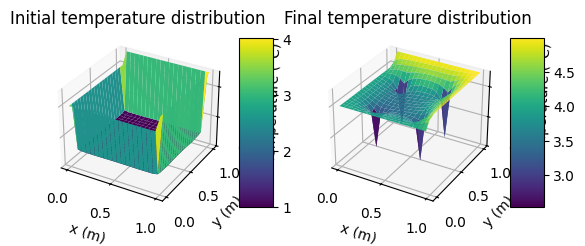

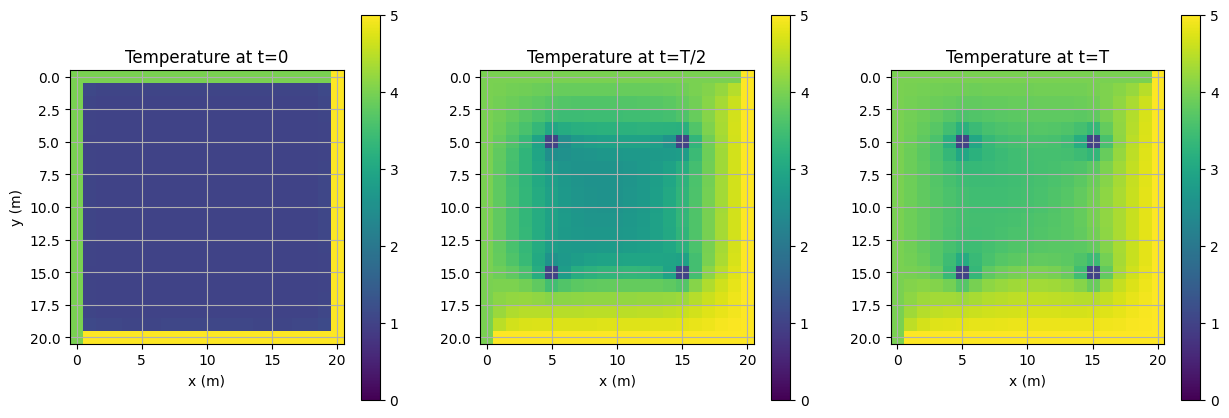

In [20]:
# Assuming X, Y, and u_save are already defined

X, Y = np.meshgrid(x_domain, y_domain)

# Plot the final temperature distribution
fig = plt.figure()

# Initial temperature distribution
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, u_save[0], cmap='viridis')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_zlabel('Temperature (°C)')
ax1.set_title('Initial temperature distribution')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
ax1.set_zlim([0, 5])

# Final temperature distribution
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, u_save[-1], cmap='viridis')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_zlabel('Temperature (°C)')
ax2.set_title('Final temperature distribution')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
ax2.set_zlim([0, 5])

plt.show()

# Plot heatmaps of temperature distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Temperature at t=0
c1 = axes[0].imshow(u_save[0], cmap='viridis', vmin=0, vmax=5)
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')
axes[0].set_title('Temperature at t=0')
axes[0].grid(True)
fig.colorbar(c1, ax=axes[0])

# Temperature at t=T/2
c2 = axes[1].imshow(u_save[u_save.shape[0]//2], cmap='viridis', vmin=0, vmax=5)
axes[1].set_xlabel('x (m)')
axes[1].set_title('Temperature at t=T/2')
axes[1].grid(True)
fig.colorbar(c2, ax=axes[1])

# Temperature at t=T
c3 = axes[2].imshow(u_save[-1], cmap='viridis', vmin=0, vmax=5)
axes[2].set_xlabel('x (m)')
axes[2].set_title('Temperature at t=T')
axes[2].grid(True)
fig.colorbar(c3, ax=axes[2])

plt.show()

np.float64(1.0)